2

In [1]:
import numpy as np
a = np.random.random((2, 2))
print(a)
for i in range(2):
    print(sum(a[i,:])/min(a[:,i]))

[[0.09442876 0.8706625 ]
 [0.05461015 0.99853498]]
17.672379837023747
1.2095905394553617


4

In [2]:
x = np.ones(10) 
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
for k in range(len(i)):
    x[i[k]] += 1
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


3 (исходя из предположения, что такой элемент будет)

In [3]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
mask = x == 0 
x = np.append(x,min(x))
x = np.delete(x, 0)
print(max(x[mask]))

5


In [9]:
import math

def dist( point, clusters ):
    return list( map( lambda v: math.sqrt( np.sum(abs( point + ( v * -1 ) ) ** 2 ) ), clusters ) )

def maxDist( centers, clusters ):
    matr = ( centers, clusters )
    return np.max( list( map( lambda v: np.max( dist( v[0], v[1:][0] ) ) / len(v[1:][0]), matr ) ) )

def kmeans( x, k_or_guess, iter_max = 1000, crit = 0.5 ):
    if ( type(k_or_guess) is int ):
        ind = np.arange(len(x))
        np.random.shuffle(ind)
        rind = ind[:k_or_guess]

        clusters = x[rind]
    else:
        clusters = np.array( k_or_guess )
    
    cl_dist = clusters * clusters

    max_dist = max( dist( np.zeros( len( x[0] ) ), cl_dist ) )
    print( max_dist )
    max_dist_new = 0
    iterations = 0
    while ( abs(max_dist - max_dist_new) > crit ) and ( iterations < iter_max ):
        max_dist_new = max_dist
        dists = list(map( lambda v: dist( v, clusters ), x ))
        distrib = list( map( lambda v: np.argmin(v), dists ) )
        matr = np.column_stack( ( distrib, x ) )
        
        clusters_info = list( map( lambda v: np.array( list( filter( lambda t: t[0] == v, matr ) ) )[:,1:], np.arange( len( clusters ) ) ) )
        
        clusters_centers = list( map( lambda v: np.mean( v, axis = 0 ), clusters_info ) )

        cl_dist = np.absolute( clusters_centers + ( -1 * clusters ) )
        clusters = np.array(clusters_centers)
        max_dist = maxDist( clusters, clusters_info )
        iterations+=1
    print( 'Finished in', iterations, 'iterations.' )
    print( 'Cluster centers:', clusters )
    distortion = max_dist
    print( 'Distortion:', distortion )
    return clusters, distortion


1

In [5]:
import numpy as np
a = np.random.random((10, 3))
print(a)
print(a[np.arange(10), np.argmin(np.abs(a - 0.5), axis = 1)])

[[0.08696628 0.67618491 0.77435471]
 [0.49980952 0.70601438 0.60542815]
 [0.56136012 0.57972754 0.87860565]
 [0.51036626 0.55569021 0.36016377]
 [0.9431624  0.02005851 0.30720947]
 [0.62256735 0.6696067  0.74234181]
 [0.95939464 0.59465701 0.67613272]
 [0.57286342 0.68375341 0.1554939 ]
 [0.84064052 0.82302264 0.29002604]
 [0.58603775 0.62971606 0.32467083]]
[0.67618491 0.49980952 0.56136012 0.51036626 0.30720947 0.62256735
 0.59465701 0.57286342 0.29002604 0.58603775]


6

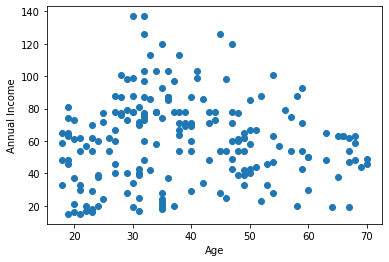

16004.624362977096
Finished in 2 iterations.
Cluster centers: [[ 23.78571429  71.35714286]
 [ 24.45        55.8       ]
 [ 54.95121951  58.73170732]
 [ 54.34782609  34.73913043]
 [ 27.72972973  27.21621622]
 [ 36.5        124.        ]
 [ 39.46666667  98.4       ]
 [ 36.54761905  78.92857143]]
Distortion: 23.455923167350566


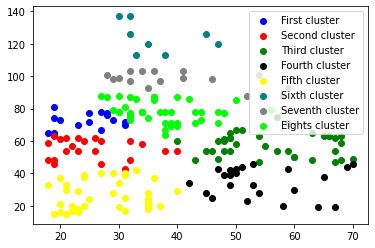

In [48]:
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)

data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
data[:5]

plt.scatter(data[:, 2], data[:, 3])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()


#lis = []
#lis.append(list(kmeans(data[:, 2:4], 2))[1])
#for k in range(3, 10):
#    lis.append(list(kmeans(data[:, 2:4], k))[1] - list(kmeans(data[:, 2:4], k - 1))[1])
#n = np.argmin(np.abs(lis)) + 2
#print(n)  #в этом случае n = 8

a = []

dat =  kmeans( data[:,2:4], 8 ) 
dataset = list( dat )
centroids = np.array( dataset[0] )
for i in range( len ( centroids ) ):
    a.append( [0] )
m = [0] * len( data[:,3] )
for j in range( len( data[:,3] ) ):
    m[j] = np.argmin(np.array( [np.linalg.norm( data[:,2:4][j] - centroids[i] ) for i in range( len( centroids ) ) ] ) )
    a[m[j]].append(data[:,2:4][j])
for i in range( len( centroids ) ):
    a[i].pop(0)
my_color = ('b','r','g','black','yellow','teal','gray','lime','coral','silver','navy')
my_label = ('First', 'Second','Third','Fourth','Fifth','Sixth','Seventh','Eights'  )
for l in range(8): # визуализация
    mask = dat[0] == l
    plt.scatter(*np.array(a[l]).T,color=my_color[l], label = my_label[l]+' cluster')
plt.legend()
plt.show()

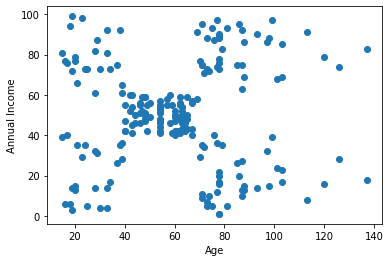

7540.585653647865
Finished in 3 iterations.
Cluster centers: [[86.53846154 82.12820513]
 [88.52941176 16.55882353]
 [32.81081081 69.10810811]
 [26.30434783 20.91304348]
 [58.32835821 48.29850746]]
Distortion: 47.94917501669299


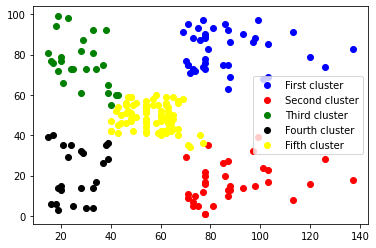

In [58]:
plt.scatter(data[:, 3], data[:, 4])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

a = []

dat = kmeans(data[:,3:5], 5)
dataset = list(dat)
centroids = np.array(dataset[0])
for i in range(len(centroids)):
    a.append([0])
m = [0] * len(data[:,3])
for j in range( len( data[:,3] ) ):
    m[j] = np.argmin(np.array([np.linalg.norm( data[:,3:5][j] - centroids[i]) for i in range(len(centroids))]))
    a[m[j]].append(data[:,3:5][j])
for i in range(len(centroids)):
    a[i].pop(0)
for l in range(5): # визуализация
    mask = dat[0] == l
    plt.scatter(*np.array(a[l]).T,color=my_color[l], label = my_label[l]+' cluster')
plt.legend()
plt.show()

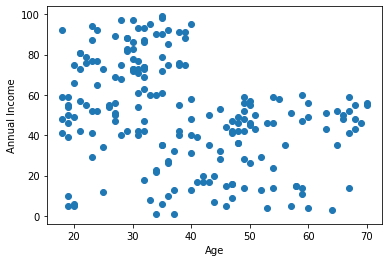

9834.341462446786
Finished in 5 iterations.
Cluster centers: [[35.52173913 83.16304348]
 [41.68518519 41.30555556]]
Distortion: 21.12759941190029
4327.216310747592
Finished in 6 iterations.
Cluster centers: [[39.98360656 19.93442623]
 [28.46341463 74.2195122 ]
 [52.57894737 48.03508772]]
Distortion: 32.08959252285174
8470.199053150995
Finished in 4 iterations.
Cluster centers: [[28.98701299 75.92207792]
 [45.02439024 34.09756098]]
Distortion: 21.067794845149038
6006.376778058466
Finished in 8 iterations.
Cluster centers: [[43.29166667 15.02083333]
 [27.32608696 49.36956522]
 [30.1754386  82.35087719]
 [55.40816327 48.04081633]]
Distortion: 17.441159887144842
2434.8012239195214
Finished in 5 iterations.
Cluster centers: [[28.47619048 73.63095238]
 [49.31944444 44.97222222]
 [41.52272727 14.02272727]]
Distortion: 16.53361634426205
6575.804285408743
Finished in 4 iterations.
Cluster centers: [[43.29166667 15.02083333]
 [31.28571429 90.39285714]
 [27.225      46.85      ]
 [55.70833333 48.

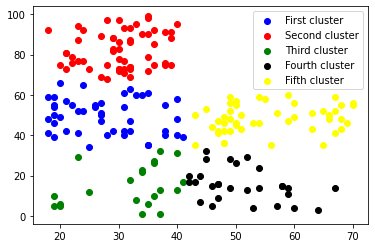

In [99]:


plt.scatter(data[:, 2], data[:, 4])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()
#print('kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk')
a = []
lis = []
lis.append(list(kmeans(data[:, 2:4], 2))[1])
for k in range(3, 10):
    lis.append(list(kmeans(data_lis, k))[1] - list(kmeans(data_lis, k - 1))[1])
n = np.argmin(np.abs(lis)) + 2
#print('kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk')
dataset = list( kmeans(data_lis, 5) )
centroids = np.array( dataset[0] )
for i in range( len( centroids ) ):
    a.append( [0] )
m = [0] * len( data[:,3] )
for j in range( len( data[:,3] ) ):
    m[j] = np.argmin( np.array( [np.linalg.norm( data_lis[j] - centroids[i] ) for i in range( len( centroids ) ) ] ) )
    a[m[j]].append( data_lis[j] )
for i in range( len( centroids ) ):
    a[i].pop(0)
for l in range(5): # визуализация
    mask = dat[0] == l
    plt.scatter(*np.array(a[l]).T,color=my_color[l], label = my_label[l]+' cluster')
plt.legend()
plt.show()